# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2,
                                                   random_state = 0)

In [4]:
print(x_train[:2])
print(x_test.shape)

[[    58 144000]
 [    59  83000]]
(80, 2)


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [6]:
print(x_train[:4])
print(x_test[:4])

[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]]
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]]


## Training the K-NN model on the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 5, 
                           metric ='minkowski', p = 2 )
Knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting a new result

In [8]:
print(Knn.predict(Scaler.transform(np.array([[20,82000]]))))

[0]


## Predicting the Test set results

In [9]:
y_pred = Knn.predict(x_test)
y_pred[:10] == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

## Making the Confusion Matrix

[[55  3]
 [ 1 21]]


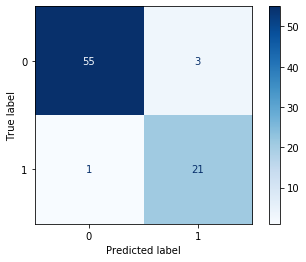

In [10]:
from  sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(Knn, x_test,y_test,cmap='Blues')

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = Scaler.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, Knn.predict(Scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results